Saving stars.csv to stars (3).csv
        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



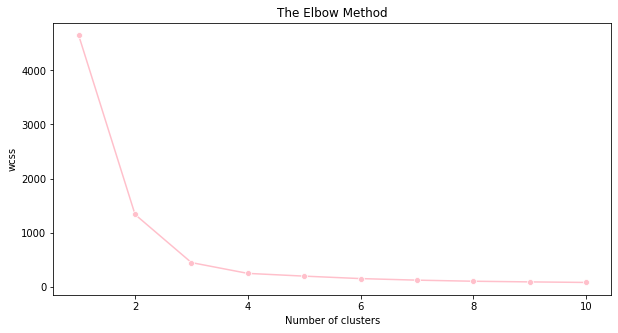

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

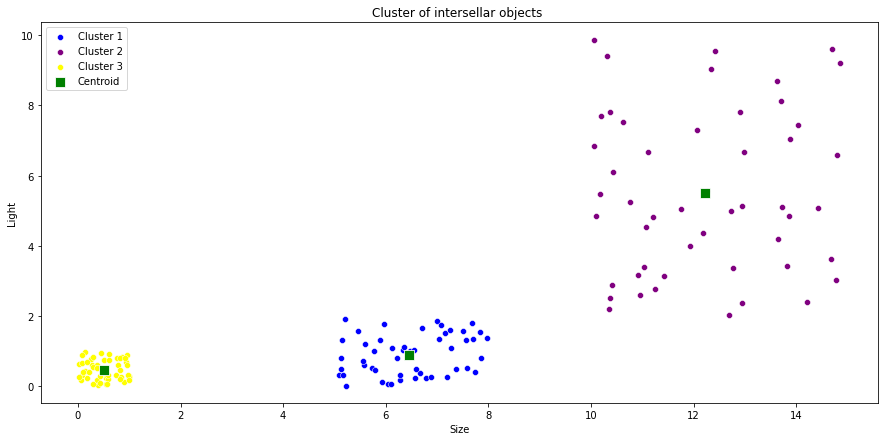

In [4]:
#Uploading files
from google.colab import files
data_to_load = files.upload()

import pandas as pd
import plotly.express as px

#Read the data from the file
df = pd.read_csv("stars.csv")
print(df.head())

#Graphing a scatterplot 
fig = px.scatter(df, x="Size", y="Light") 
fig.show()

#Find the best K value by using the wcss parameter and the elbow method
from sklearn.cluster import KMeans
x = df.iloc[:,[0,1]].values

#Inertia method returns wcss for that model
wcss = []
for i in range(1,11):
  kvar= KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kvar.fit(x)
  wcss.append(kvar.inertia_)

#Graph the line graph for the elbow method
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (10,5))
sns.lineplot(range(1,11), wcss, marker='o', color="pink")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss") #Identifying how many clusters there are 
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmean = kmeans.fit_predict(x)
plt.figure(figsize= (15,7))
sns.scatterplot(x[y_kmean==0,0],x[y_kmean==0,1], color="blue", label="Cluster 1")
sns.scatterplot(x[y_kmean==1,0],x[y_kmean==1,1], color="purple", label="Cluster 2")
sns.scatterplot(x[y_kmean==2,0],x[y_kmean==2,1], color="yellow", label="Cluster 3")
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="green", label="Centroid",s=100, marker=',')
plt.grid(False)
plt.title("Cluster of intersellar objects ")
plt.xlabel("Size")
plt.ylabel("Light")
plt.legend()
plt.show()
